In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Heart_Disease.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df = df.rename(columns = {'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholestoral', 
                     'fbs': 'fasting_blood_sugar', 'restecg': 'resting_ecg', 'thalach': 'maximum_heart_rate',
                     'exang': 'exercise_angina', 'ca': 'num_major_vessels'})

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df = df.iloc[:-3]

In [8]:
X = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_ecg',
        'maximum_heart_rate','exercise_angina', 'oldpeak', 'slope', 'num_major_vessels', 'thal']]
y = df['target']

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [10]:
# standardize the numerical features
standardize = StandardScaler()
standardize.fit(X_train.iloc[:, :], y_train)

# standardize.transform(...)
X_train.iloc[:, :] = standardize.transform(X_train.iloc[:, :])
X_test.iloc[:, :] = standardize.transform(X_test.iloc[:, :])

In [11]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [12]:
y_test.sort_values(inplace=True)
X_test = X_test.reindex(y_test.index)

In [13]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

**Train the classifiers on:**
- X_train 

#### MLPClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression

In [14]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

In [15]:
labels = [x.__class__.__name__ for x in models]

In [16]:
model_predictions = []

In [17]:
X_train.shape

(240, 13)

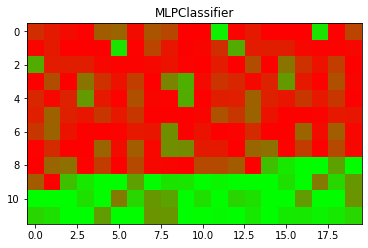

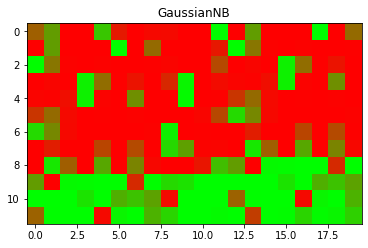

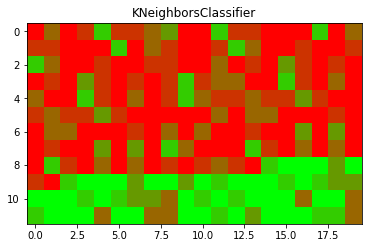

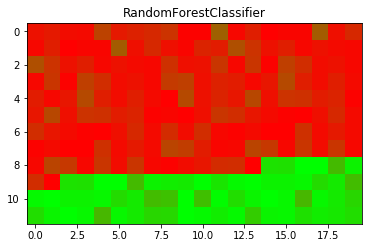

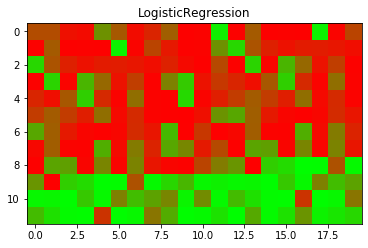

In [18]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    for i in range(12):
        row = []
        for j in range(20):
            row.append(blended[i*12+j])
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (12, 20, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [19]:
matrix = np.zeros((len(models), len(models)))

In [20]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### MLPClassifier

In [21]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_model_y_test_predictions = nn_model.predict(X_test)

**Train the other classifiers on:**
- X_train + more labeled points given by the "reference” model

In [22]:
X_train = np.concatenate((X_train, X_test), axis=0)

In [23]:
y_train = np.concatenate((y_train.to_numpy(), nn_model_y_test_predictions), axis=0)

In [24]:
X_train.shape

(300, 13)

In [25]:
model_predictions = []

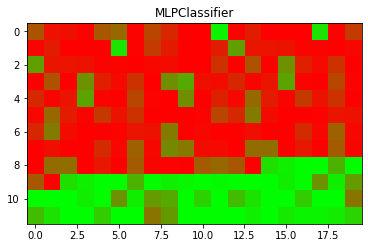

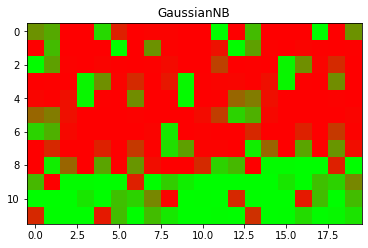

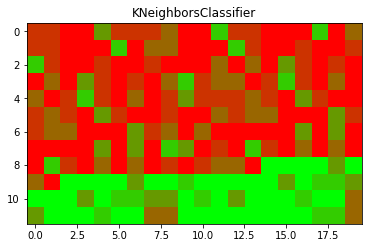

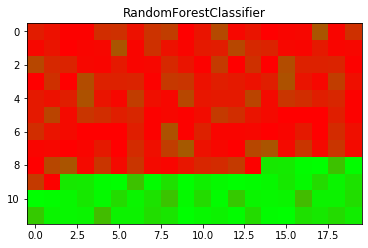

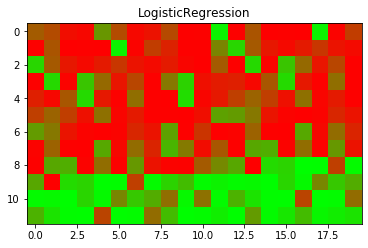

In [26]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    for i in range(12):
        row = []
        for j in range(20):
            row.append(blended[i*12+j])
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (12, 20, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [27]:
matrix2 = np.zeros((len(models), len(models)))

In [28]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix2[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### Comparison

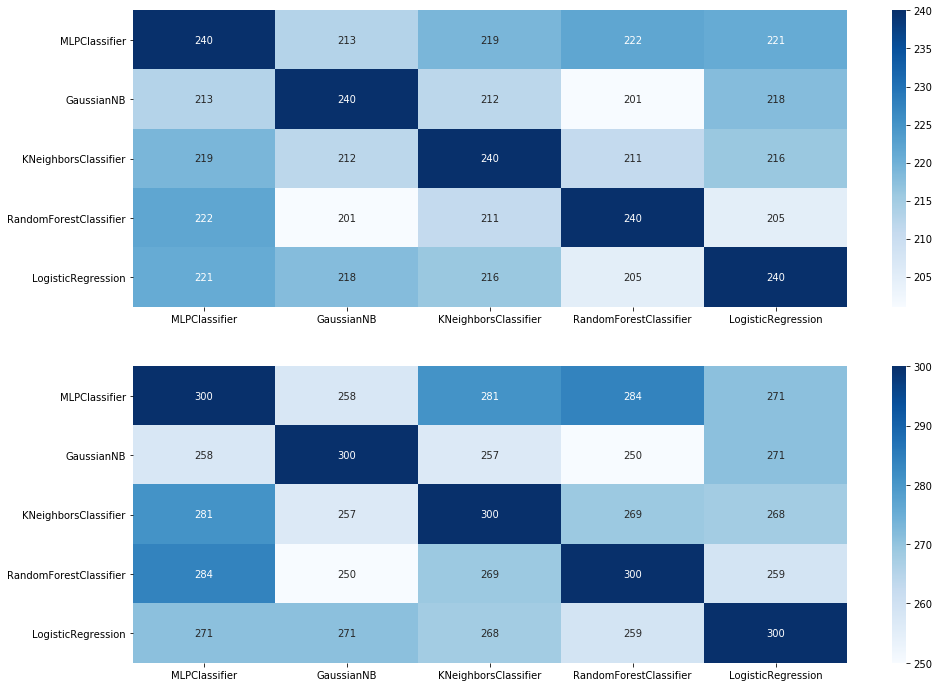

In [29]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

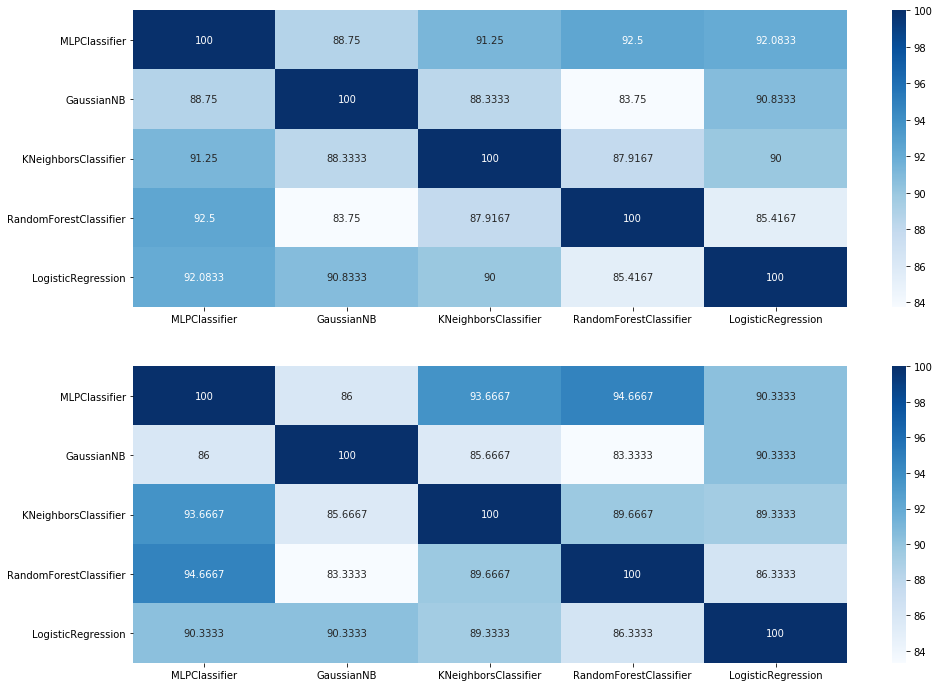

In [30]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2 / matrix2.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

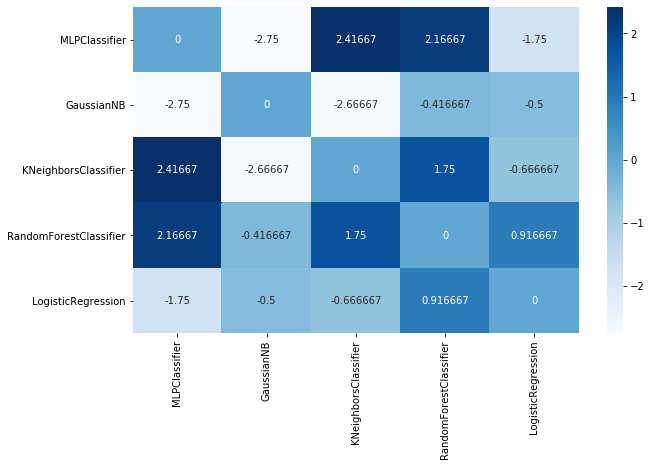

In [31]:
plt.figure(figsize=(10, 6))
seaborn.heatmap(matrix2 / matrix2.max() * 100 - matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')